### 1.4: Some statistics with pandas

In [2]:
# import moduled
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Load in the SF crimes dataset:

In [3]:
crime = pd.read_csv('../../assets/datasets/sf_crime.csv')

#### 2. Print the head

In [4]:
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2003-03-23 23:27:00,ARSON,ARSON OF A VEHICLE,Sunday,BAYVIEW,NONE,0 Block of HUNTERS PT EXPWY EX,-122.376945,37.733018
1,2006-03-07 06:45:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,0 Block of MARINA BL,-122.432952,37.805052
2,2004-03-06 03:00:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421
3,2011-12-03 12:10:00,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,TARAVAL,"ARREST, BOOKED",3200 Block of 20TH AV,-122.475647,37.728528
4,2003-01-10 00:15:00,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Friday,NORTHERN,NONE,POLK ST / BROADWAY ST,-122.421772,37.795946


#### 3. Print the unique categories and how many there are

In [5]:
crime.columns

Index([u'Dates', u'Category', u'Descript', u'DayOfWeek', u'PdDistrict',
       u'Resolution', u'Address', u'X', u'Y'],
      dtype='object')

#### 4. Print the unique districts and how many there are

In [6]:
pd.unique(crime.PdDistrict)

array(['BAYVIEW', 'NORTHERN', 'SOUTHERN', 'TARAVAL', 'MISSION',
       'INGLESIDE', 'CENTRAL', 'TENDERLOIN', 'RICHMOND', 'PARK'], dtype=object)

#### 5. Make a DataFrame of the crime categories and the number of crimes per category

In [7]:
crime['Category'].value_counts()

LARCENY/THEFT                  4934
OTHER OFFENSES                 3656
NON-CRIMINAL                   2601
ASSAULT                        2164
DRUG/NARCOTIC                  1533
VEHICLE THEFT                  1506
VANDALISM                      1280
WARRANTS                       1239
BURGLARY                       1023
SUSPICIOUS OCC                  891
MISSING PERSON                  771
ROBBERY                         630
FRAUD                           537
SECONDARY CODES                 283
FORGERY/COUNTERFEITING          281
WEAPON LAWS                     255
PROSTITUTION                    223
TRESPASS                        209
STOLEN PROPERTY                 137
SEX OFFENSES FORCIBLE           120
DRUNKENNESS                     105
DISORDERLY CONDUCT              105
RECOVERED VEHICLE                80
DRIVING UNDER THE INFLUENCE      75
KIDNAPPING                       71
RUNAWAY                          58
ARSON                            52
LIQUOR LAWS                 

#### 6. Make a DataFrame of the districts and crime counts per district

In [22]:
crime['PdDistrict'].value_counts()



SOUTHERN      4413
MISSION       3416
NORTHERN      3076
BAYVIEW       2555
CENTRAL       2424
TENDERLOIN    2336
INGLESIDE     2256
TARAVAL       1804
PARK          1438
RICHMOND      1282
Name: PdDistrict, dtype: int64

In [9]:
crime.head(3)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2003-03-23 23:27:00,ARSON,ARSON OF A VEHICLE,Sunday,BAYVIEW,NONE,0 Block of HUNTERS PT EXPWY EX,-122.376945,37.733018
1,2006-03-07 06:45:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,0 Block of MARINA BL,-122.432952,37.805052
2,2004-03-06 03:00:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421


In [10]:
crime.groupby(['Category', 'PdDistrict']).count()

Dates  Descript  DayOfWeek  Resolution  Address  \
Category      PdDistrict                                                    
ARSON         BAYVIEW        11        11         11          11       11   
              CENTRAL         5         5          5           5        5   
              INGLESIDE       6         6          6           6        6   
              MISSION         7         7          7           7        7   
              NORTHERN        7         7          7           7        7   
              PARK            1         1          1           1        1   
              RICHMOND        2         2          2           2        2   
              SOUTHERN        8         8          8           8        8   
              TARAVAL         4         4          4           4        4   
              TENDERLOIN      1         1          1           1        1   
ASSAULT       BAYVIEW       244       244        244         244      244   
              CENTRAL       186       186        186         186      186   
              INGLESIDE     245       245        245         245      245   
              MISSION       342       342        342         342      342   
              NORTHERN      236       236        236         236      236   
              PARK          106       106        106         106      106   
              RICHMOND      102       102        102         102      102   
              SOUTHERN      343       343        343         343      343   
              TARAVAL       148       148        148         148      148   
              TENDERLOIN    212       212        212         212      212   
BAD CHECKS    BAYVIEW         4         4          4           4        4   
              CENTRAL         2         2          2           2        2   
              MISSION         2         2          2           2        2   
              NORTHERN        1         1          1           1        1   
              RICHMOND        2         2          2           2        2   
              SOUTHERN        1         1          1           1        1   
              TENDERLOIN      2         2          2           2        2   
BRIBERY       BAYVIEW         2         2          2           2        2   
              MISSION         1         1          1           1        1   
              RICHMOND        1         1          1           1        1   
...                         ...       ...        ...         ...      ...   
VEHICLE THEFT BAYVIEW       205       205        205         205      205   
              CENTRAL       118       118        118         118      118   
              INGLESIDE     261       261        261         261      261   
              MISSION       199       199        199         199      199   
              NORTHERN      174       174        174         174      174   
              PARK          112       112        112         112      112   
              RICHMOND      127       127        127         127      127   
              SOUTHERN      126       126        126         126      126   
              TARAVAL       160       160        160         160      160   
              TENDERLOIN     24        24         24          24       24   
WARRANTS      BAYVIEW       129       129        129         129      129   
              CENTRAL        91        91         91          91       91   
              INGLESIDE      70        70         70          70       70   
              MISSION       169       169        169         169      169   
              NORTHERN      141       141        141         141      141   
              PARK           61        61         61          61       61   
              RICHMOND       36        36         36          36       36   
              SOUTHERN      276       276        276         276      276   
              TARAVAL        42        42         42          42       42   
              TENDERLO

#### 7. Make a DataFrame of the day of week and crime counts per day

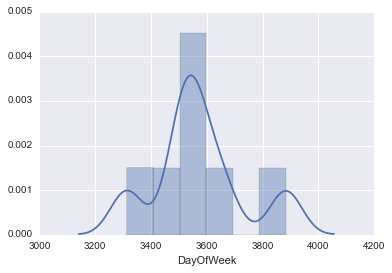

In [21]:
crime_days_of_week = crime['DayOfWeek'].value_counts()
crime_days_of_week 

sns.distplot(crime_days_of_week)

In [19]:
# Group by PD, DoW, Cat then count each of the individual categories
grouped_crime = crime.groupby(['PdDistrict', 'DayOfWeek','Category'])['Category'].count()


grouped_crime

gcrime = pd.DataFrame(grouped_crime)

In [20]:
gcrime

Category
PdDistrict DayOfWeek Category                        
BAYVIEW    Friday    ARSON                          1
                     ASSAULT                       34
                     BURGLARY                      21
                     DISORDERLY CONDUCT             1
                     DRUG/NARCOTIC                 27
                     DRUNKENNESS                    2
                     EMBEZZLEMENT                   1
                     FORGERY/COUNTERFEITING         5
                     FRAUD                          7
                     KIDNAPPING                     1
                     LARCENY/THEFT                 36
                     MISSING PERSON                25
                     NON-CRIMINAL                  29
                     OTHER OFFENSES                67
                     RECOVERED VEHICLE              2
                     ROBBERY                        7
                     SECONDARY CODES                9
                     SEX OFFENSES FORCIBLE          2
                     SUSPICIOUS OCC                22
                     TRESPASS                       4
                     VANDALISM                     32
                     VEHICLE THEFT                 20
                     WARRANTS                      16
                     WEAPON LAWS                   10
           Monday    ASSAULT                       47
                     BURGLARY                      22
                     DISORDERLY CONDUCT             1
                     DRUG/NARCOTIC                 20
                     EMBEZZLEMENT                   1
                     FAMILY OFFENSES                1
...                                               ...
TENDERLOIN Tuesday   SUSPICIOUS OCC                 7
                     TRESPASS                       7
                     VANDALISM                      5
                     VEHICLE THEFT                  7
                     WARRANTS                      41
                     WEAPON LAWS                    3
           Wednesday ASSAULT                       25
                     BURGLARY                       7
                     DISORDERLY CONDUCT             4
                     DRUG/NARCOTIC                 90
                     DRUNKENNESS                    1
                     FORGERY/COUNTERFEITING         3
                     FRAUD                          3
                     LARCENY/THEFT                 37
                     LIQUOR LAWS                    1
                     LOITERING                      3
                     MISSING PERSON                 6
                     NON-CRIMINAL                  33
                     OTHER OFFENSES                70
                     PROSTITUTION                   3
                     RECOVERED VEHICLE              2
                     ROBBERY                       10
                     SEX OFFENSES FORCIBLE          2
                     STOLEN PROPERTY                1
                     SUSPICIOUS OCC                13
                     TRESPASS                       6
                     VANDALISM                      2
                     VEHICLE THEFT                  7
                     WARRANTS                      44
                     WEAPON LAWS                    3

[1745 rows x 1 columns]

#### 8. Describe one of the datasets

In [41]:
crime_days_of_week.describe()

count       7.000000
mean     3571.428571
std       173.074991
min      3313.000000
25%      3510.000000
50%      3548.000000
75%      3618.000000
max      3883.000000
Name: DayOfWeek, dtype: float64

Friday has the most crimes per day of the others, while the rest of the week is roughly about 3500 counts per day and friday is almost 400 counts above that.


#### 9. Calculate the mean difference between the experimental and control below

In [15]:
control = [4.8,17.3,7.0,10.8,9.4,2.6,9.0,9.6,12.7,8.5,15.8,11.0,9.7,13.1,6.3,4.4,7.8,
           9.9,7.8,7.7,12.8,13.2,6.1,7.1,6.4,11.7,11.8,6.3,14.4,9.8,14.9,11.4,9.1,10.4,
           13.2,10.0,13.5,10.1,15.0,8.8,5.3,15.1,7.6,9.9,4.9,9.2,12.3,12.1,6.9,8.3,7.0,
           6.1,13.4,11.5,6.0,12.3,5.6,14.7,3.7,7.6,10.9,10.3,10.3,10.2,7.1,6.3,13.2,9.9,
           10.6,9.8,4.9,16.9,9.1,6.7,12.2,8.2,10.1,15.5,11.9,9.7,7.9,13.4,10.6,7.9,13.1,
           11.9,11.6,2.9,13.9,14.4,8.6,7.6,8.3,12.0,5.2,7.1,13.6,6.5,9.9,14.8]

In [16]:
experimental = [15.4,14.7,14.0,25.3,15.1,14.6,0.0,20.5,16.9,18.9,20.1,16.5,13.1,16.4,
                18.3,21.3,6.3,9.0,12.1,7.4,25.6,10.8,11.4,12.1,22.7,20.1,18.3,9.4,11.0,
                14.8,12.5,12.3,16.4,13.3,14.1,15.7,12.2,15.2,16.9,1.5,18.6,4.2,12.2,8.2,
                15.3,9.3,12.0,22.8,19.7,10.7,17.8,15.4,14.5,22.2,16.7,19.3,17.1,17.4,5.4,
                10.9,13.7,17.1,11.2,15.0,18.2,14.2,11.0,19.6,10.9,13.9,17.3,11.1,19.9,
                11.2,25.1,23.7,16.5,17.9,20.1,15.8,26.4,17.7,18.9,5.6,25.6,10.4,15.5,17.7,
                22.9,18.9,21.2,5.5,13.2,13.4,21.9,11.1,13.7,16.9,16.4,18.8 ]

In [24]:
control_mean = pd.DataFrame(control).mean()
experimental_mean = pd.DataFrame(experimental).mean()

mean_diff = experimental_mean-control_mean
mean_diff

0    5.413
dtype: float64

#### 10. Calculate the t-statistic for the difference between means by hand (if you forgot it, look it up online or in the notes!)

The standard deviation component is the standard deviation across groups.

#### 11. Plot the control and experimental distributions using seaborn on the same plot (with different colors for each)

#### 11. [BONUS] Write a function to bootstrap the 99% confidence interval for the t-statistic.

Look up: np.percentile!